# 🧠 Understanding Decision Trees: Why, What, and How

## Why use Decision Trees?
Decision Trees are a powerful and intuitive type of machine learning model that can make predictions based on a sequence of simple yes/no questions about the data. They are popular because:

* Interpretability: You can easily visualize and understand how the model makes decisions — unlike many “black box” models.
* Versatility: They can be used for both classification (e.g., predicting survival) and regression (e.g., predicting house prices).
* No heavy preprocessing: They work with both numerical and categorical data without requiring complex feature scaling.

They’re especially useful when you want a model that can be explained to non-technical stakeholders — such as in healthcare, finance, or policy-making — where decisions must be transparent.

## What is a Decision Tree?
A Decision Tree is a flowchart-like structure:

* Nodes represent questions about a feature (e.g., “Is age < 30?”).
* Branches represent the possible answers to those questions (e.g., Yes → left branch, No → right branch).
* Leaves represent the final decision or prediction (e.g., “Survived” or “Died”).

The tree is built by splitting the data at each step in a way that maximizes how well the resulting groups separate the target classes. This is usually done using measures like Gini impurity or entropy.

## How do Decision Trees work?
1. Start with all the data at the root node.
1. Choose the best feature and threshold that split the data into the most “pure” groups (where members are similar in terms of the target variable).
1. Repeat the splitting process for each new branch, stopping when:
    1. All samples in a node are from the same class,
    1. The maximum depth is reached, or
    1. Splitting no longer improves prediction quality.
1. Use the tree for prediction: follow the path from root to leaf according to the feature values of the input.

## How a Decision Tree Works

A **decision tree** is a machine learning model that makes decisions by asking a series of questions about your data. It's like a flowchart where each internal node represents a test on a feature (e.g., "Is the weather sunny?"), each branch represents the outcome of the test, and each leaf node represents a final decision or classification.

The tree is built by repeatedly splitting the data into subsets based on the most important features. The goal is to create subsets that are as "pure" as possible, meaning they contain data points belonging to just one class.

# 📄 Notebook Summary: Decision Trees on the Titanic Dataset
This notebook uses the Titanic dataset as a real-world case study to learn and demonstrate how Decision Trees work. Decision Trees are widely used in data science because they can make predictions while remaining transparent and easy to interpret, which is crucial in domains where you need to explain decisions to others (e.g., healthcare, finance, safety-critical systems).

The problem we’re addressing here is: Given information about a passenger’s class, gender, age, and fare, can we predict whether they would have survived the Titanic disaster? This mimics real-life classification challenges where historical data is used to predict future outcomes.

The workflow is:

1. Load the data — Access Seaborn’s built-in Titanic dataset.
2. Prepare the data — Select key features, encode categorical variables, and handle missing values.
3. Train a Decision Tree Classifier — Fit a model that learns survival patterns from the data.
4. Visualize the decision-making process — Create a diagram showing the splits and rules the tree uses.
5. Test and interpret predictions — Apply the model to example passengers and trace its reasoning step-by-step.

By the end of the notebook, you will:

* Understand how Decision Trees break down a classification problem into simple, interpretable rules.
* See how these rules can be visualized and explained to non-technical audiences.
* Recognize how this approach can be applied to similar predictive problems in other domains.


# Load and prep data

In [24]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load Titanic dataset
df = sns.load_dataset('titanic')

# Drop the exact duplicate-of-target column
df = df.drop(columns=['alive'])

# Drop rows with missing target
df = df.dropna(subset=['survived'])

# Encode all object and category columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    df[col] = df[col].astype(str)  # ensure all strings (so NaN becomes 'nan')
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Fill numeric NaNs with column means (simple approach)
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].fillna(df[col].mean())

# Separate features and target
X = df.drop(columns=['survived'])
y = df['survived']

X.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
0,3,1,22.0,1,0,7.2500,2,2,1,True,7,2,False
1,1,0,38.0,1,0,71.2833,0,0,2,False,2,0,False
2,3,0,26.0,0,0,7.9250,2,2,2,False,7,2,True
3,1,0,35.0,1,0,53.1000,2,0,2,False,2,2,False
4,3,1,35.0,0,0,8.0500,2,2,1,True,7,2,True


# Train a Decision tree classifier
## Gini Impurity Explained

**Gini impurity** is a metric used to measure the "purity" of a node. A node is considered pure if all the data points in it belong to the same class.

- A **Gini impurity of 0** means the node is perfectly pure (e.g., all data points are 'yes').
- A **Gini impurity of 1** means the node is completely mixed (e.g., data points are equally split between all classes).

The decision tree algorithm calculates the Gini impurity for each potential split and chooses the one that results in the **greatest reduction in impurity**. This is the core principle behind how the tree "learns" to make decisions. The formula for Gini impurity is:

$G = 1 - \sum_{i=1}^{c} p_{i}^{2}$

where $p_{i}$ is the probability of an item being in class $i$, and $c$ is the number of classes.


## `DecisionTreeClassifier` Parameters

When you create a decision tree model using `scikit-learn`, these parameters control how the tree is built.

- `DecisionTreeClassifier`: This is the function for creating a classification decision tree model.
- `max_depth=3`: This sets the maximum number of levels (splits) the tree can have. A depth of 3 means the tree will have at most three layers of decisions. This is an important way to prevent **overfitting**, where the model becomes too complex and memorizes the training data instead of learning general patterns.
- `random_state=42`: This ensures that the random processes within the algorithm are reproducible. Since some parts of the tree-building process can be random, setting a `random_state` guarantees you get the **exact same tree every time you run the code**. This is essential for debugging and consistent results.

In [27]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

# Visualize the decision-making process

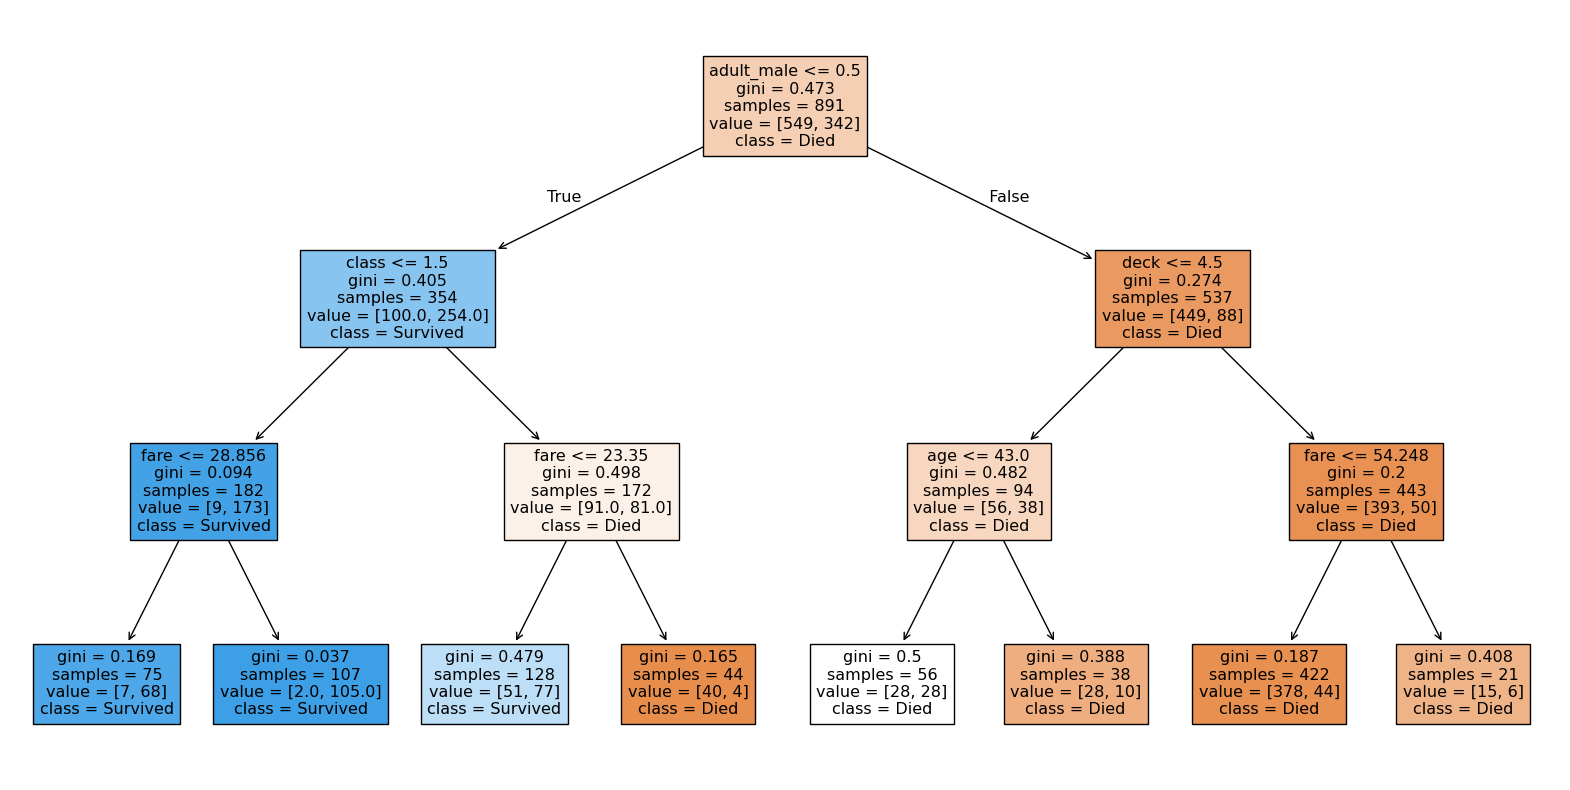

In [28]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
tree.plot_tree(
    clf,
    feature_names=X.columns,
    class_names=['Died', 'Survived'],
    filled=True
)
plt.show()

# Test and interpret predictions

Now let's take up a notch with a depth of 10 decision tree.

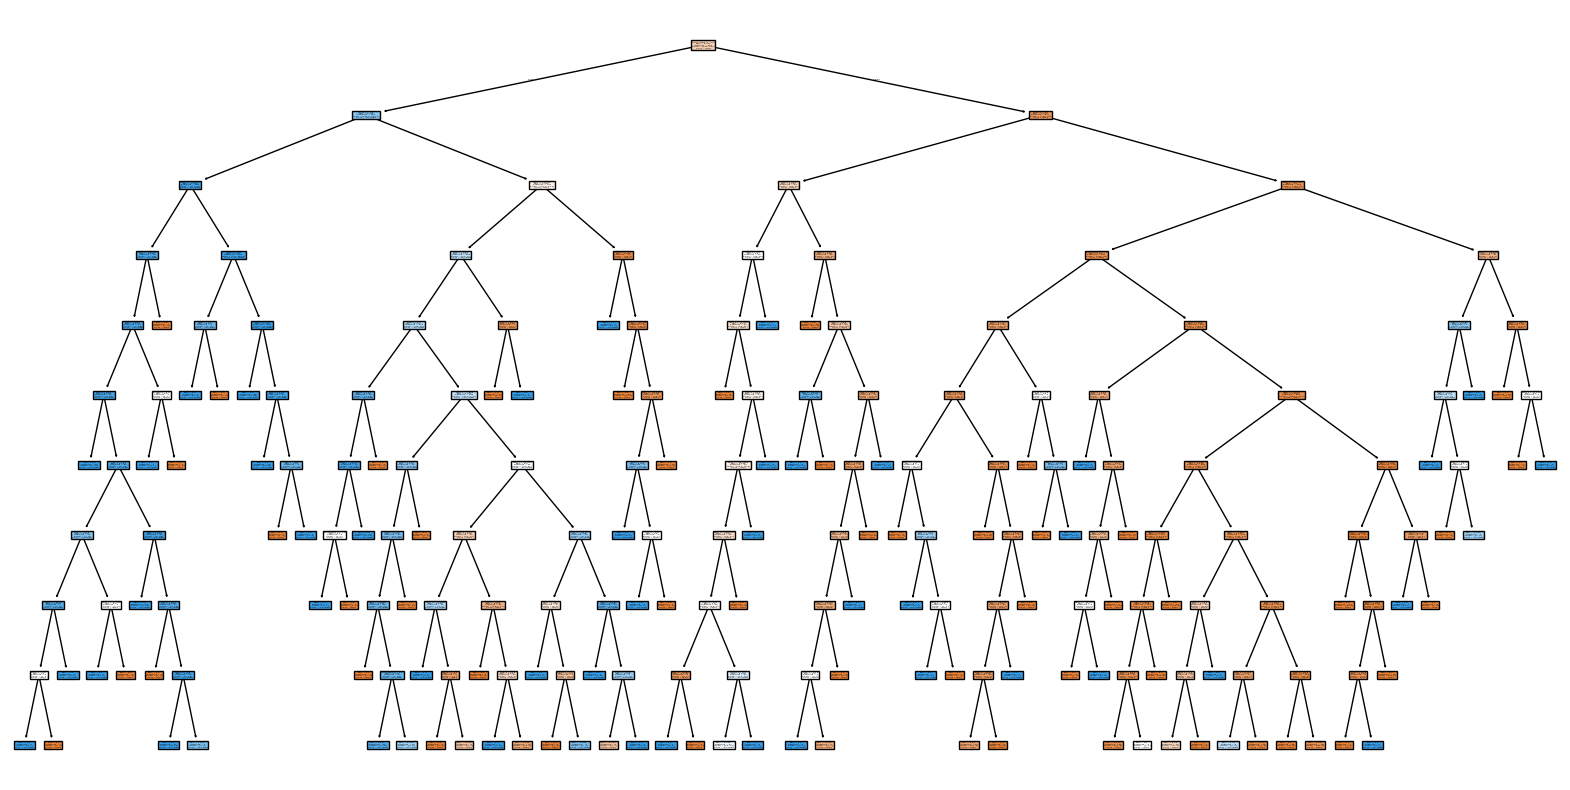

GridBox(children=(FloatSlider(value=1.0, description='Class', max=3.0, min=1.0, step=0.02), IntSlider(value=0,…

Output()

In [33]:
import pandas as pd
import seaborn as sns # Needed if you use sns.load_dataset directly in this cell, but user loads outside
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from IPython.display import display, HTML, clear_output
import ipywidgets as widgets
from io import StringIO

plt.figure(figsize=(20, 10))
tree.plot_tree(
    clf,
    feature_names=X.columns,
    class_names=['Died', 'Survived'],
    filled=True
)
plt.show()

clf = DecisionTreeClassifier(max_depth=10, random_state=42)
clf.fit(X, y)

# --- Build feature_metadata and feature_names_ordered reliably from X ---
# This section remains in the Canvas as it dynamically creates necessary metadata
# from the already preprocessed X DataFrame and label_encoders.
feature_metadata = {}
feature_names_ordered = X.columns.tolist() # This ensures the correct order of features

for col in feature_names_ordered:
    if col in label_encoders: # It was a categorical column and encoded
        le = label_encoders[col]
        feature_metadata[col] = {
            "is_categorical": True,
            "categories": [str(c) for c in le.classes_],
            "min_val": float(X[col].min()),
            "max_val": float(X[col].max()),
        }
    else: # It's a numerical column (either original numeric or became numeric via fillna)
        feature_metadata[col] = {
            "is_categorical": False,
            "categories": [],
            "min_val": float(X[col].min()),
            "max_val": float(X[col].max()),
        }

# --- Extract Tree Data for Traversal ---
tree_ = clf.tree_
class_names = ['Died', 'Survived'] # From your plot_tree call

# --- Field Descriptions for Legend and Short Labels ---
FIELD_DESCRIPTIONS = {
    "pclass": "Class (1st, 2nd, 3rd)",
    "sex": "Sex (Female/Male)",
    "age": "Age (years)",
    "sibsp": "Siblings/Spouses",
    "parch": "Parents/Children",
    "fare": "Fare",
    "embarked": "Embarked (Port)",
    "class": "Ticket Class (First, Second, Third)",
    "who": "Type (child, man, woman)",
    "adult_male": "Adult Male?",
    "deck": "Deck (A-G, Unknown)",
    "embark_town": "Embark Town",
    "alone": "Alone?"
}

# --- Helper Function to Get Display Value ---
def get_display_value(feature_name, value):
    """Converts encoded value back to original category name if categorical."""
    if feature_metadata.get(feature_name, {}).get("is_categorical"):
        le = label_encoders.get(feature_name)
        if le:
            try:
                # Find the closest integer and map back
                return le.inverse_transform([round(value)])[0]
            except ValueError:
                # Handle cases where the rounded value might be out of original encoder's bounds
                # This could happen if a slider goes outside the original mapped categories
                return f"Cat Index {round(value)} (Out of bounds)"
    return f"{value:.2f}" # Format numerical values

# --- Function to Traverse the Tree and Display Path ---
def traverse_and_display_tree(passenger_input_values):
    """
    Traverses the decision tree with given passenger values and displays the path and prediction.
    """
    clear_output(wait=True) # Clear previous output for fresh display

    current_node_id = 0
    path_steps = []
    final_prediction = "Unknown"

    # Use StringIO to capture print statements for HTML display
    output_buffer = StringIO()

    # Print a header for the output
    output_buffer.write("<h3 style='color:#1e3a8a; font-weight:bold;'>Decision Path & Prediction:</h3>")
    output_buffer.write("<div style='background-color:#f0f9ff; padding:15px; border-radius:10px; box-shadow:0 2px 4px rgba(0,0,0,0.05);'>")

    while True:
        feature_idx = tree_.feature[current_node_id]
        threshold = tree_.threshold[current_node_id]

        # Check if it's a leaf node
        if feature_idx == -2:
            counts = tree_.value[current_node_id][0] # [[died_count, survived_count]]
            prediction_idx = 0 if counts[0] > counts[1] else 1
            final_prediction = class_names[prediction_idx]

            # Style the final prediction
            pred_color = '#10b981' if final_prediction == 'Survived' else '#ef4444'
            output_buffer.write(f"<p style='padding:10px; margin-top:10px; border-left:4px solid {pred_color}; background-color:#dbeafe; font-weight:bold; color:{pred_color.replace('ef4444', 'dc2626')};'>")
            output_buffer.write(f"&#10148; Reached Leaf Node. Prediction: <strong>{final_prediction.upper()}</strong></p>")
            break

        feature_name = feature_names_ordered[feature_idx]
        passenger_value = passenger_input_values.get(feature_name) # Use .get() to safely handle missing keys
        if passenger_value is None:
            output_buffer.write(f"<p style='color:red;'>Error: Input value for feature '{feature_name}' missing.</p>")
            break

        display_val = get_display_value(feature_name, passenger_value)

        decision_text = ""
        if passenger_value <= threshold:
            decision_text = f"&#10148; Condition: <b>{feature_name.replace('_', ' ')} ({display_val}) &#8804; {threshold:.2f}</b><br>&#8594; Goes LEFT"
            current_node_id = tree_.children_left[current_node_id]
        else:
            decision_text = f"&#10148; Condition: <b>{feature_name.replace('_', ' ')} ({display_val}) &gt; {threshold:.2f}</b><br>&#8594; Goes RIGHT"
            current_node_id = tree_.children_right[current_node_id]

        output_buffer.write(f"<p style='padding:8px; margin-bottom:5px; border-left:3px solid #60a5fa; background-color:#f0f9ff;'>{decision_text}</p>")

        # Safety break for unexpected tree structures or infinite loops
        if len(path_steps) > clf.max_depth + 2: # Max depth + a couple more for safety
            output_buffer.write("<p style='color:red;'>Error: Tree traversal exceeded expected depth. Malformed tree data?</p>")
            break
        path_steps.append(decision_text) # Add to list to prevent infinite loop

    output_buffer.write("</div>")
    display(HTML(output_buffer.getvalue()))


# --- 6. Create Interactive Widgets ---
# Use a dictionary to hold all widgets so we can access their values
passenger_widgets = {}

for feature_name in feature_names_ordered:
    meta = feature_metadata.get(feature_name)
    if not meta:
        print(f"Warning: Metadata missing for feature {feature_name}. Skipping widget creation.")
        continue

    # Get description for the feature - this will be the short label on the slider
    short_description_text = FIELD_DESCRIPTIONS.get(feature_name, feature_name.replace('_', ' ').title()).split('(')[0].strip()
    
    # Categorical features as IntSlider for selection, will map back to string
    if meta["is_categorical"]:
        slider = widgets.IntSlider(
            min=int(meta["min_val"]),
            max=int(meta["max_val"]),
            step=1,
            value=int(meta["min_val"]), # Default to first category
            description=short_description_text, # Use only the short description
            orientation='horizontal',
            readout=True,
            readout_format='d',
        )
        # Custom display for categorical slider
        def update_categorical_display(change, f_name=feature_name, sld=slider, meta_cats=meta["categories"], short_desc=short_description_text):
            current_index = change.new
            category_display = ""
            if 0 <= current_index < len(meta_cats):
                category_display = f" ({meta_cats[current_index]})"
            else:
                category_display = f" (Invalid Index {current_index})"
            sld.description = f"{short_desc}{category_display}"

        slider.observe(update_categorical_display, names='value')
        # Initialize description with short description and initial category
        slider.description = f"{short_description_text} ({meta['categories'][int(meta['min_val'])]})"

    # Numerical features as FloatSlider
    else:
        slider = widgets.FloatSlider(
            min=meta["min_val"],
            max=meta["max_val"],
            step=(meta["max_val"] - meta["min_val"]) / 100.0, # 100 steps
            value=meta["min_val"], # Default to min value
            description=short_description_text, # Use only the short description
            orientation='horizontal',
            readout=True,
            readout_format='.2f',
        )

    passenger_widgets[feature_name] = slider

# --- 7. Create Interactive Dashboard ---
# Create an interactive function using widgets.interactive
def interactive_dashboard(**kwargs):
    """Collects slider values and calls the tree traversal function."""
    passenger_values = {}
    for feature_name, value in kwargs.items():
        passenger_values[feature_name] = value
    traverse_and_display_tree(passenger_values)

# Display the widgets and link them to the interactive function
interactive_output = widgets.interactive(interactive_dashboard, **passenger_widgets)

# Arrange widgets in a VBox or HBox for better layout
controls_layout = widgets.GridBox(list(passenger_widgets.values()), layout=widgets.Layout(grid_template_columns="repeat(3, 1fr)", gap="20px", width="95%"))

# --- Generate and display the legend ---
legend_html_buffer = StringIO()
legend_html_buffer.write("<h3 style='color:#1e3a8a; font-weight:bold; margin-top:30px;'>Field Descriptions:</h3>")
legend_html_buffer.write("<ul style='list-style-type: none; padding: 0; display: grid; grid-template-columns: repeat(2, 1fr); gap: 10px; font-size: 0.9em; color: #555;'>")
for feature_name in feature_names_ordered:
    full_description = FIELD_DESCRIPTIONS.get(feature_name, feature_name.replace('_', ' ').title())
    legend_html_buffer.write(f"<li style='background-color:#e6f3ff; padding:8px; border-radius:5px;'><b>{feature_name.replace('_', ' ').title()}:</b> {full_description}</li>")
legend_html_buffer.write("</ul>")
display(HTML(legend_html_buffer.getvalue()))

# Display the controls and the output area
display(HTML("<h2 style='color:#2563eb; text-align:center; margin-bottom:20px; font-weight:bold;'>Adjust Passenger Attributes</h2>"))
display(controls_layout)
display(interactive_output.children[-1]) # This displays the output area
